<h1 style="font-weight:bold;"><i style="color:teal;">MACHINE LEARNING</i></h1>

<h5 style="font-weight:bold;"><i style="color:teal;">By:</i></h5>
<i style="color: black; font-weight:bold;"><br/> - Safae NABET<br/> - Hanae ELKORRI</i><br/><br/>

<h2 style="font-weight:bold;"><i style="color:tomato;">Clustering using the K-means method:</i></h2>

We want to split the customers of a hotel, based on three variables that describe their bookings, into segments to see which ones present profit potential for the hotel.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
df = pd.read_csv("hotel_data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'changed_room', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'country

In [4]:
print(df["stays_in_week_nights"].unique())
print(df["stays_in_weekend_nights"].unique())

[ 0  1  2  3  4  5 11  8 10  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 25 17 32 26 18 34 35 41]
[ 0  1  2  4  3  6 13  8  5  7 12  9 16 10 14]


In [5]:
df["stays_in"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]

In [6]:
indexNames = df[ df['hotel'] == 1 ].index
df0 = df.drop(indexNames , inplace=False)

In [7]:
print(df.shape)
print(df0.shape)

(118898, 44)
(79302, 44)


In [8]:
df1 = df0.loc[:, ['lead_time','adr', 'stays_in']]

In [9]:
df1.head()

,lead_time,adr,stays_in
39596,6,0.0,2
39597,88,76.5,4
39598,65,68.0,4
39599,92,76.5,6
39600,100,76.5,2


In [10]:
df2 = df1.sample(n=500)

<IPython.core.display.Javascript object>


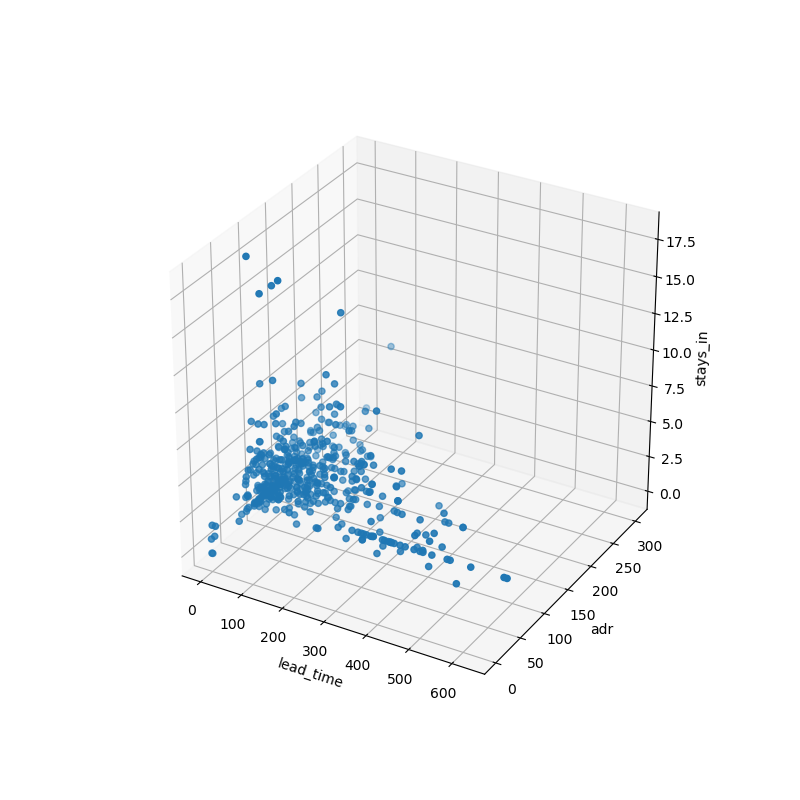

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X = df2['lead_time']
Y = df2['adr']
Z = df2['stays_in']
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel('stays_in')
ax.scatter(X, Y, Z)

In [12]:
X_std = StandardScaler().fit_transform(df2)

#### Number of clusters = 2:

In [13]:
km0 = KMeans(n_clusters=2, max_iter=100)
km0.fit(X_std)
centroids = km0.cluster_centers_
label0 = km0.labels_
print(np.unique(label0))

[0 1]


<IPython.core.display.Javascript object>


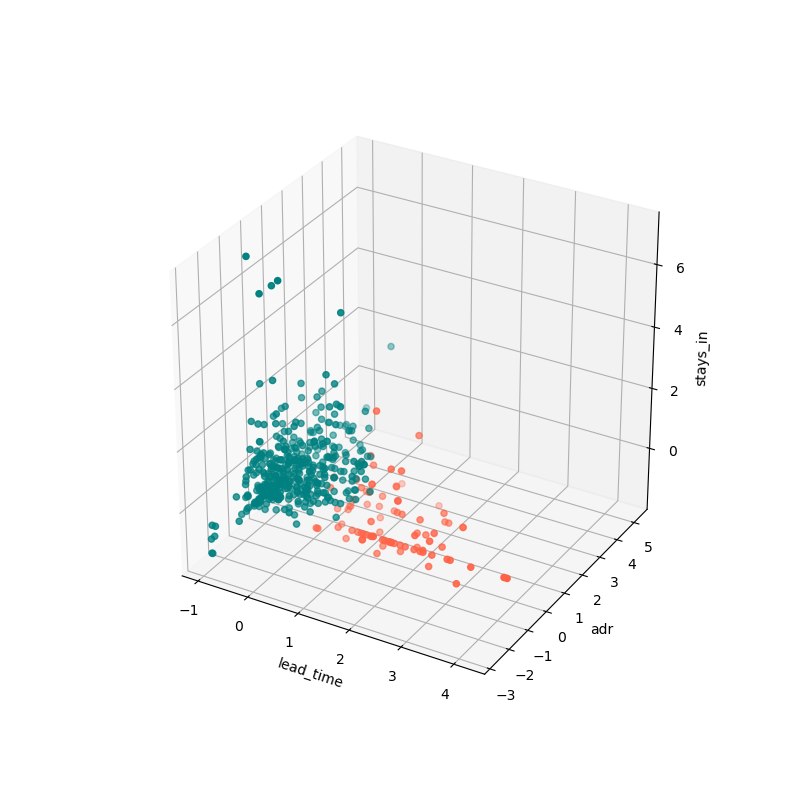

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X00 = X_std[km0.labels_ == 0, 0] 
Y00 = X_std[km0.labels_ == 0, 1]
Z00 = X_std[km0.labels_ == 0, 2]
X01 = X_std[km0.labels_ == 1, 0] 
Y01 = X_std[km0.labels_ == 1, 1]
Z01 = X_std[km0.labels_ == 1, 2]
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel('stays_in')
ax.scatter(X00, Y00, Z00, c='teal', label='cluster 1')
ax.scatter(X01, Y01, Z01, c='tomato', label='cluster 2')

We change the number of max iterations to see if it will affect the results. It seems like the results did not change:

In [21]:
km0 = KMeans(n_clusters=2, max_iter=1000)
km0.fit(X_std)
centroids = km0.cluster_centers_
label0 = km0.labels_
print(np.unique(label0))

[0 1]


<IPython.core.display.Javascript object>


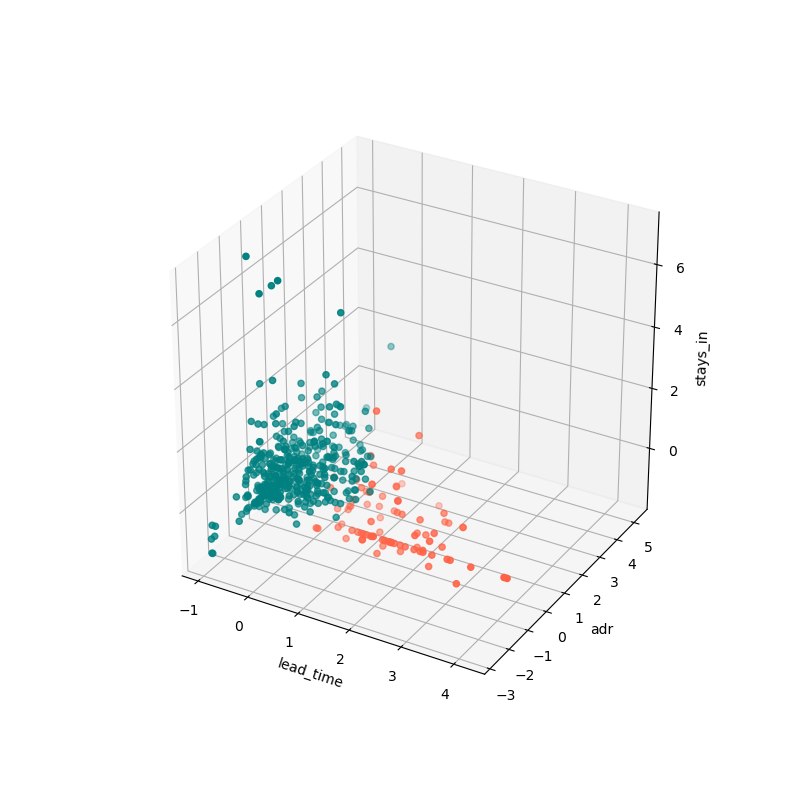

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X00 = X_std[km0.labels_ == 0, 0] 
Y00 = X_std[km0.labels_ == 0, 1]
Z00 = X_std[km0.labels_ == 0, 2]
X01 = X_std[km0.labels_ == 1, 0] 
Y01 = X_std[km0.labels_ == 1, 1]
Z01 = X_std[km0.labels_ == 1, 2]
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel('stays_in')
ax.scatter(X00, Y00, Z00, c='teal', label='cluster 1')
ax.scatter(X01, Y01, Z01, c='tomato', label='cluster 2')

#### Number of clusters = 3:

In [15]:
km1 = KMeans(n_clusters=3, max_iter=100)
km1.fit(X_std)
centroids = km1.cluster_centers_
label1 = km1.labels_
print(np.unique(label1))

[0 1 2]


<IPython.core.display.Javascript object>


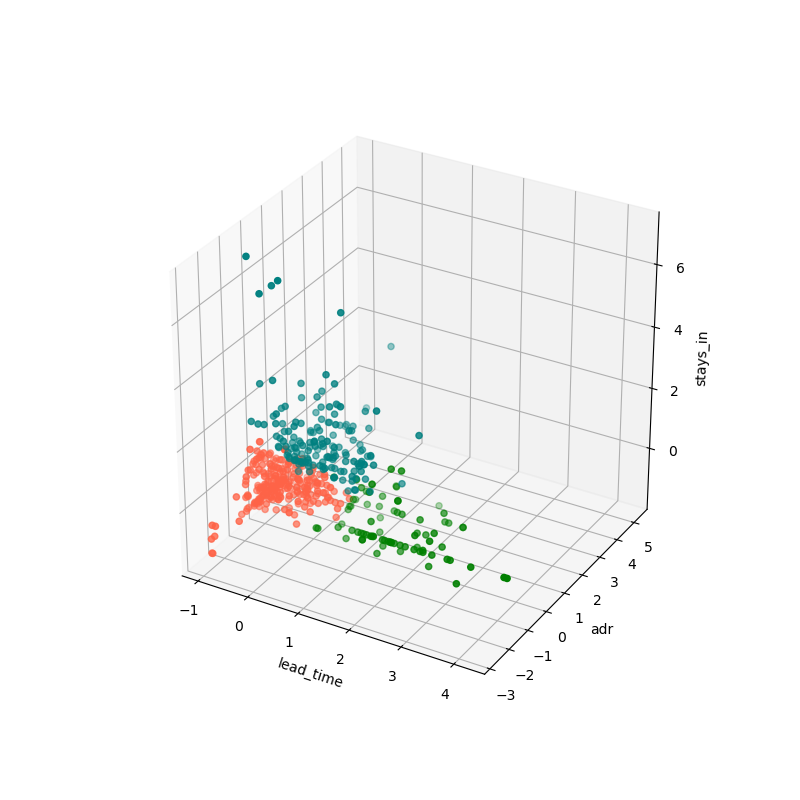

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X10 = X_std[km1.labels_ == 0, 0] 
Y10 = X_std[km1.labels_ == 0, 1]
Z10 = X_std[km1.labels_ == 0, 2]
X11 = X_std[km1.labels_ == 1, 0] 
Y11 = X_std[km1.labels_ == 1, 1]
Z11 = X_std[km1.labels_ == 1, 2]
X12 = X_std[km1.labels_ == 2, 0] 
Y12 = X_std[km1.labels_ == 2, 1]
Z12 = X_std[km1.labels_ == 2, 2]
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel('stays_in')
ax.scatter(X10, Y10, Z10, c='teal', label='cluster 1')
ax.scatter(X11, Y11, Z11, c='tomato', label='cluster 2')
ax.scatter(X12, Y12, Z12, c='green', label='cluster 3')

#### Number of clusters = 4:

In [17]:
km2 = KMeans(n_clusters=4, max_iter=100)
km2.fit(X_std)
centroids = km2.cluster_centers_
label2 = km2.labels_
print(np.unique(label2))

[0 1 2 3]


<IPython.core.display.Javascript object>


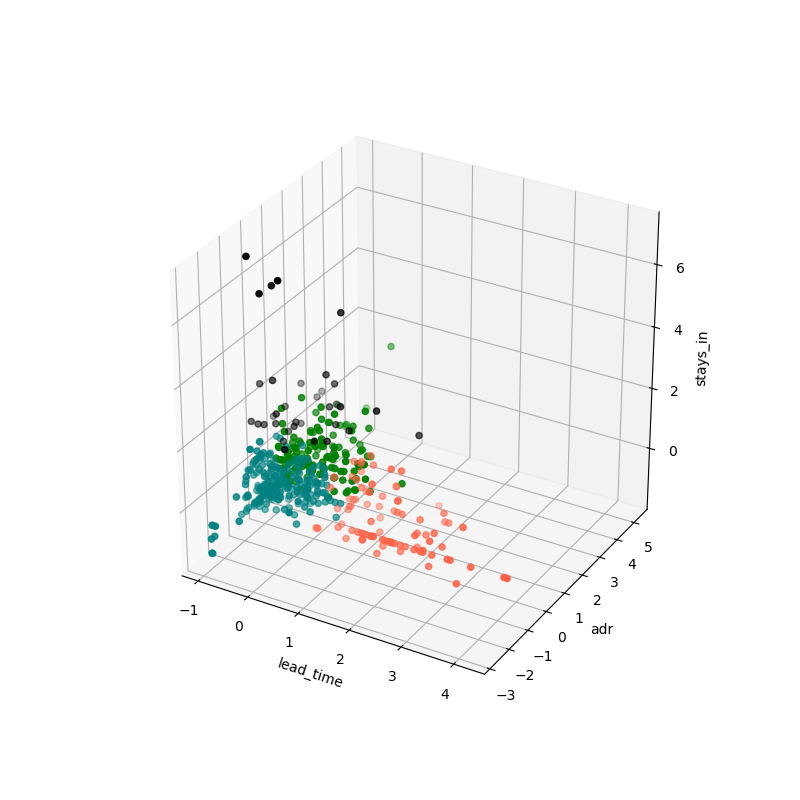

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X20 = X_std[km2.labels_ == 0, 0] 
Y20 = X_std[km2.labels_ == 0, 1]
Z20 = X_std[km2.labels_ == 0, 2]
X21 = X_std[km2.labels_ == 1, 0] 
Y21 = X_std[km2.labels_ == 1, 1]
Z21 = X_std[km2.labels_ == 1, 2]
X22 = X_std[km2.labels_ == 2, 0] 
Y22 = X_std[km2.labels_ == 2, 1]
Z22 = X_std[km2.labels_ == 2, 2]
X23 = X_std[km2.labels_ == 3, 0] 
Y23 = X_std[km2.labels_ == 3, 1]
Z23 = X_std[km2.labels_ == 3, 2]
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel('stays_in')
ax.scatter(X20, Y20, Z20, c='teal', label='cluster 1')
ax.scatter(X21, Y21, Z21, c='tomato', label='cluster 2')
ax.scatter(X22, Y22, Z22, c='green', label='cluster 3')
ax.scatter(X23, Y23, Z23, c='black', label='cluster 4')